In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from transformers import pipeline
from Sentiment_analysis import Sentiment
from datetime import datetime

sentiment = Sentiment()

Device set to use mps:0


In [2]:
df = pd.read_csv('files/detik_semua_artikel.csv')
df.head()

,judul,isi,hari,tanggal,jam,kategori,link
0,Sulitnya Hapus Data Registrasi Aplikasi Dana,Saya ingin medaftar akun Dana (PT Espay Debit ...,Jumat,23 Mei 2025,15:32 WIB,detikNewsSuara Pembaca,https://news.detik.com/suara-pembaca/d-7928775...
1,Penawaran investasi PT Rifan Berjangka Tak Ses...,Saya adalah nasabah komoditas berjangka dari P...,Jumat,23 Mei 2025,15:15 WIB,detikNewsSuara Pembaca,https://news.detik.com/suara-pembaca/d-7928735...
2,"Dilindungi Asuransi, Dua Bulan Lebih Perbaikan...","Pada Oktober 2024, saya membeli mobil Ioniq 5 ...",Jumat,23 Mei 2025,14:33 WIB,detikNewsSuara Pembaca,https://news.detik.com/suara-pembaca/d-7928621...
3,Satu Tahun Menunggu Proses Refund Dana Member ...,Kami merupakan salah satu Mitra Member Loket P...,Jumat,16 Mei 2025,11:41 WIB,detikNewsSuara Pembaca,https://news.detik.com/suara-pembaca/d-7916830...
4,"Diklaim Lebih Kuat dari Kaca dan Acrylic, Sola...",Saya membeli Solartuff dari Impact Pratama Gro...,Selasa,13 Mei 2025,22:57 WIB,detikNewsSuara Pembaca,https://news.detik.com/suara-pembaca/d-7912935...


In [3]:
# Konversi tanggal seperti sebelumnya
bulan_map = {
    'Januari': '01', 'Februari': '02', 'Maret': '03', 'April': '04',
    'Mei': '05', 'Juni': '06', 'Juli': '07', 'Agustus': '08',
    'September': '09', 'Oktober': '10', 'November': '11', 'Desember': '12'
}

def parse_tanggal(t):
    for indo, num in bulan_map.items():
        t = t.replace(indo, num)
    return pd.to_datetime(t, format='%d %m %Y', errors='coerce')

df['date'] = df['tanggal'].str.strip().apply(parse_tanggal).dt.date
df['sentiment'] = df['judul'].apply(lambda text: sentiment.getSentimentLabel(text[:512]))
df.head()

,judul,isi,hari,tanggal,jam,kategori,link,date,sentiment
0,Sulitnya Hapus Data Registrasi Aplikasi Dana,Saya ingin medaftar akun Dana (PT Espay Debit ...,Jumat,23 Mei 2025,15:32 WIB,detikNewsSuara Pembaca,https://news.detik.com/suara-pembaca/d-7928775...,2025-05-23,negative
1,Penawaran investasi PT Rifan Berjangka Tak Ses...,Saya adalah nasabah komoditas berjangka dari P...,Jumat,23 Mei 2025,15:15 WIB,detikNewsSuara Pembaca,https://news.detik.com/suara-pembaca/d-7928735...,2025-05-23,negative
2,"Dilindungi Asuransi, Dua Bulan Lebih Perbaikan...","Pada Oktober 2024, saya membeli mobil Ioniq 5 ...",Jumat,23 Mei 2025,14:33 WIB,detikNewsSuara Pembaca,https://news.detik.com/suara-pembaca/d-7928621...,2025-05-23,negative
3,Satu Tahun Menunggu Proses Refund Dana Member ...,Kami merupakan salah satu Mitra Member Loket P...,Jumat,16 Mei 2025,11:41 WIB,detikNewsSuara Pembaca,https://news.detik.com/suara-pembaca/d-7916830...,2025-05-16,neutral
4,"Diklaim Lebih Kuat dari Kaca dan Acrylic, Sola...",Saya membeli Solartuff dari Impact Pratama Gro...,Selasa,13 Mei 2025,22:57 WIB,detikNewsSuara Pembaca,https://news.detik.com/suara-pembaca/d-7912935...,2025-05-13,positive


In [4]:
df.sentiment.value_counts().sort_index()

sentiment
negative    250
neutral     734
positive     16
Name: count, dtype: int64

Data Visualization

<Axes: xlabel='sentiment'>

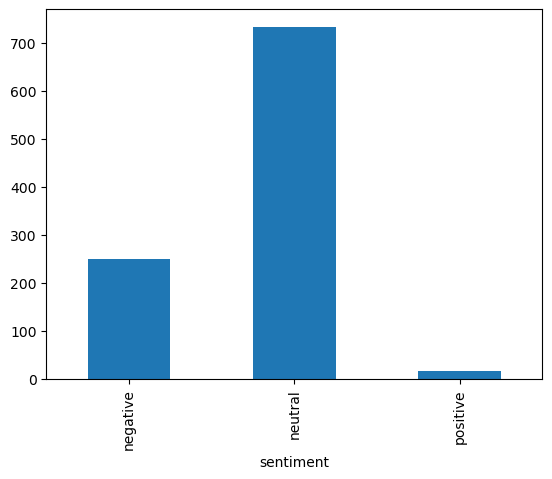

In [5]:
# simple barchart
df.sentiment.value_counts().sort_index().plot(kind='bar')

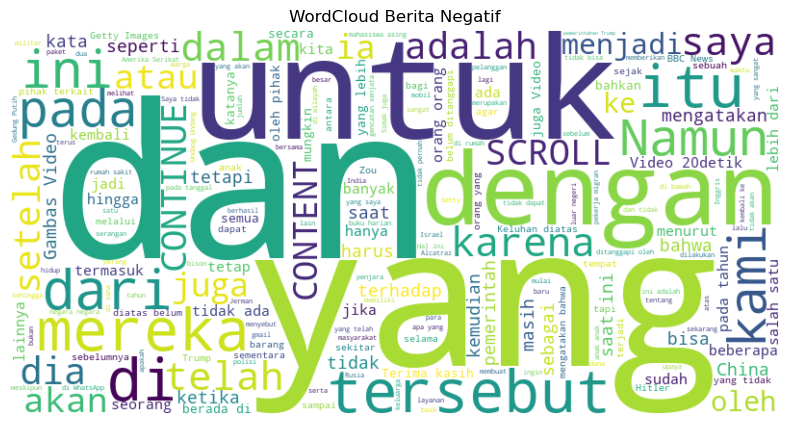

In [6]:
# simple wordcloud
negatif_text = " ".join(df[df['sentiment'] == 'negative']['isi'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negatif_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Berita Negatif")
plt.show()

**Advanced Visualization**

In [7]:
# Atur Warna
sentiment_colors = {'positive': '#4fb443', 'neutral': '#333333', 'negative': '#de061a'}

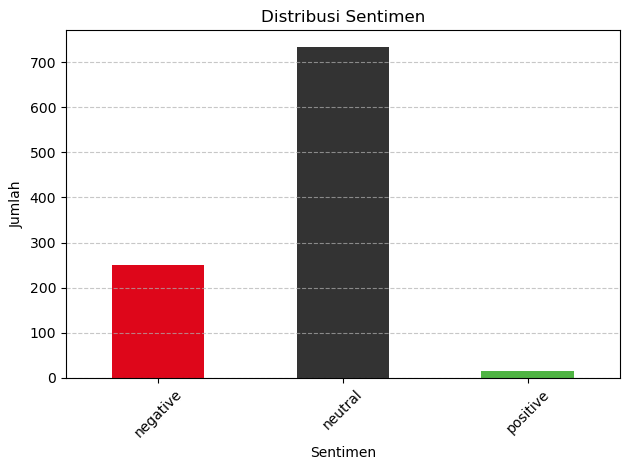

In [8]:
# === Distribusi Sentimen - Bar Chart ===
counts = df['sentiment'].value_counts().sort_index()
colors_bar = [sentiment_colors[sentiment] for sentiment in counts.index]

counts.plot(kind='bar', color=colors_bar)
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Distribusi Sentimen')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

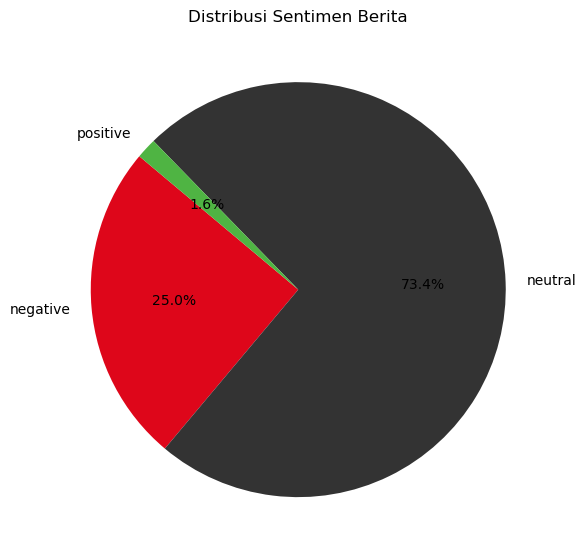

In [9]:
# === Distribusi Sentimen - Pie Chart ===
plt.figure(figsize=(6, 6))
colors_pie = [sentiment_colors[sentiment] for sentiment in counts.index]
counts.plot.pie(autopct='%1.1f%%', colors=colors_pie, startangle=140)
plt.title("Distribusi Sentimen Berita")
plt.ylabel("")
plt.tight_layout()
plt.show()


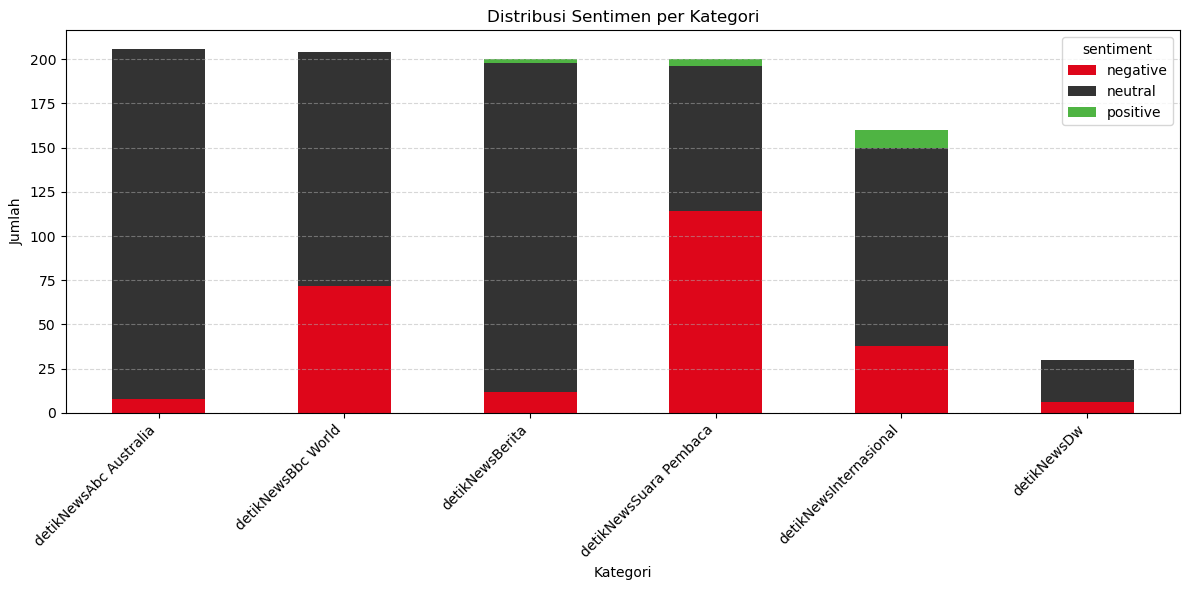

In [10]:
# Hitung distribusi sentimen per kategori
kategori_sentimen = pd.crosstab(df['kategori'], df['sentiment'])

# Urutkan berdasarkan jumlah total agar rapi (opsional)
kategori_sentimen = kategori_sentimen.loc[kategori_sentimen.sum(axis=1).sort_values(ascending=False).index]

# Plot
kategori_sentimen.plot(
    kind='bar',
    stacked=True,
    color=[sentiment_colors.get(s, '#ccc') for s in kategori_sentimen.columns],
    figsize=(12, 6)
)

plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Distribusi Sentimen per Kategori')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Calvin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


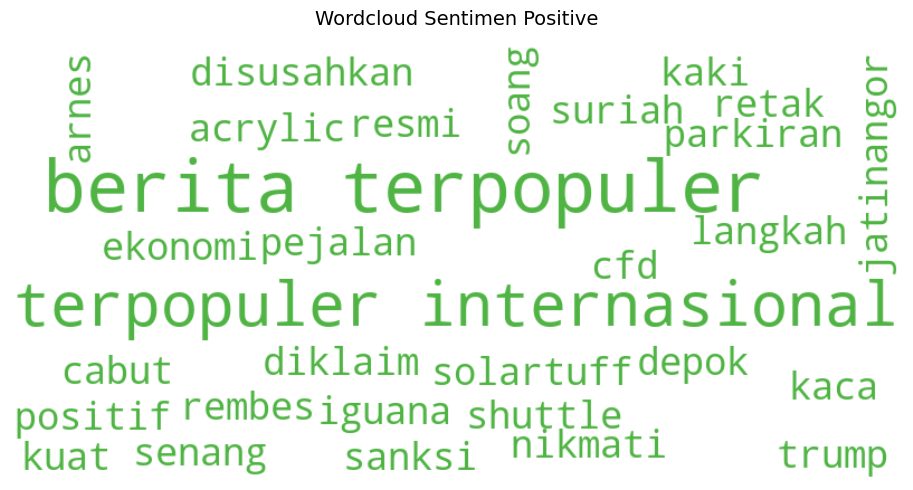

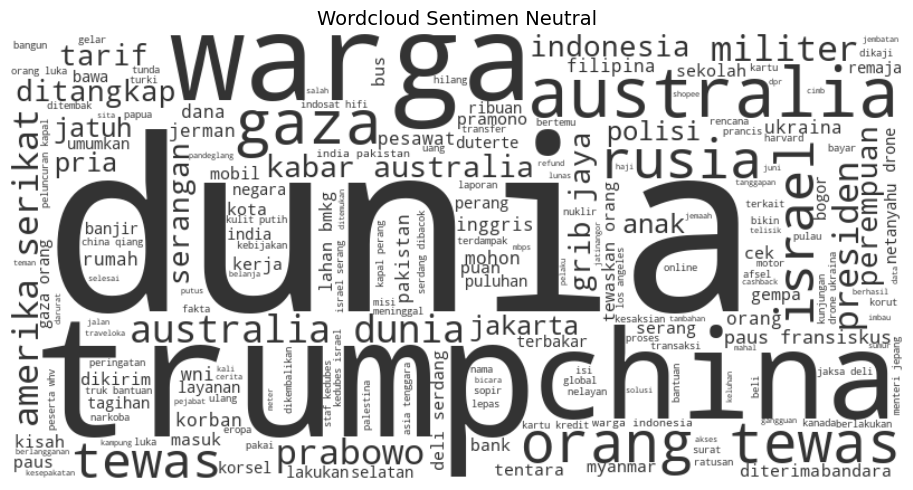

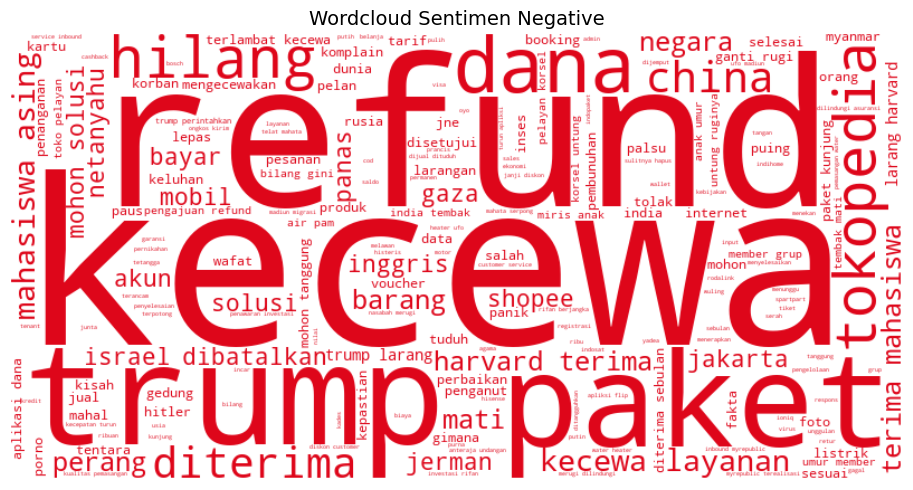

In [11]:
import re, nltk
from nltk.corpus import stopwords

# Download stopwords Indo (sekali saja)
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

# === WordCloud untuk Setiap Sentimen ===

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # Hapus karakter selain huruf & spasi
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    return tokens

def generate_wordcloud(sentiment):
    texts = df[df['sentiment'] == sentiment]['judul'].dropna()
    all_tokens = []
    for t in texts:
        all_tokens.extend(preprocess(t))
    all_text = ' '.join(all_tokens)

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=None, color_func=lambda *args, **kwargs: sentiment_colors[sentiment]).generate(all_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Wordcloud Sentimen {sentiment.capitalize()}', fontsize=14)
    plt.tight_layout()
    plt.show()

# Buat WordCloud untuk masing-masing sentimen
for sent in ['positive', 'neutral', 'negative']:
    generate_wordcloud(sent)


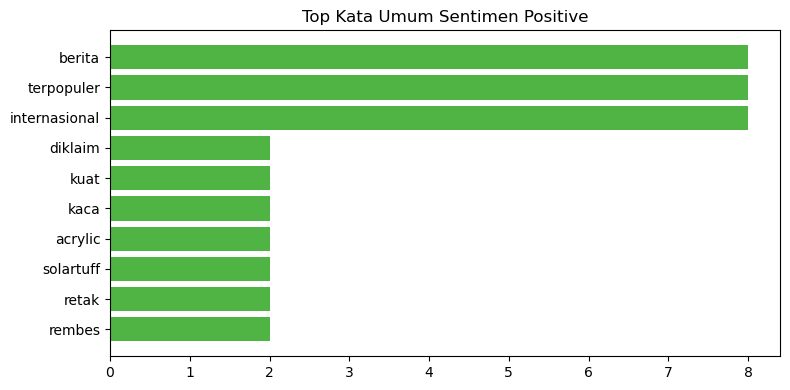

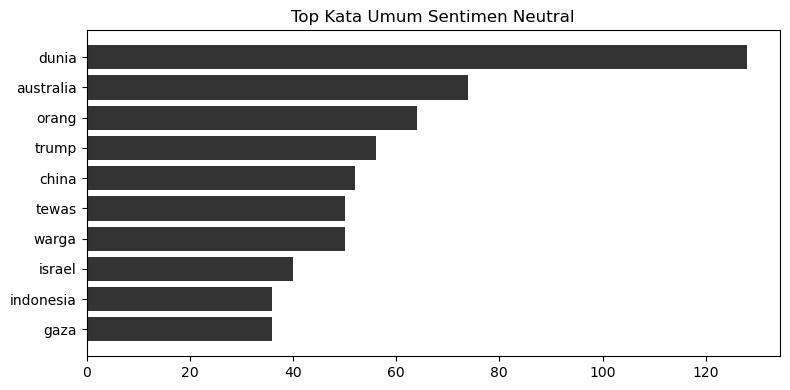

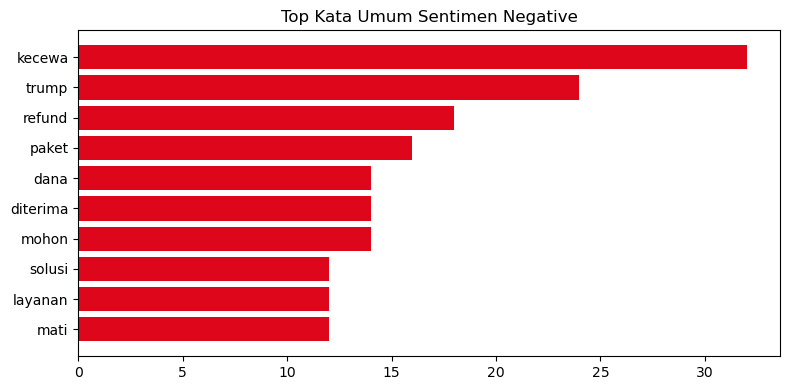

In [12]:
from collections import Counter

for sent in ['positive', 'neutral', 'negative']:
    texts = df[df['sentiment'] == sent]['judul'].dropna().tolist()
    all_tokens = []
    for t in texts:
        all_tokens.extend(preprocess(t))  # fungsi preprocessing sebelumnya
    word_freq = Counter(all_tokens).most_common(10)
    
    # Bar plot
    words, freqs = zip(*word_freq)
    plt.figure(figsize=(8,4))
    plt.barh(words, freqs, color=sentiment_colors[sent])
    plt.title(f'Top Kata Umum Sentimen {sent.capitalize()}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


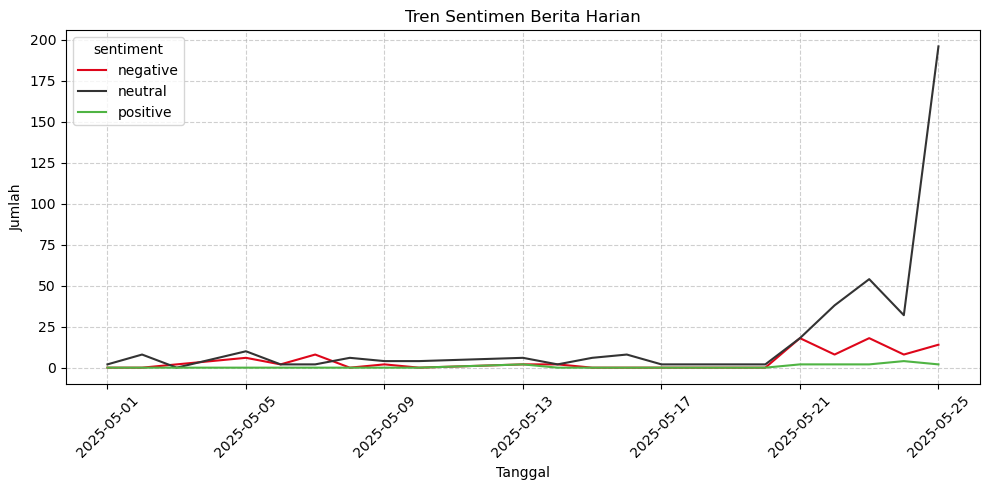

In [13]:
# Hitung jumlah sentimen per tanggal
trend_df = df.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

# Plot
trend_df.plot(kind='line', figsize=(10, 5), color=[
    sentiment_colors.get(s, '#ccc') for s in trend_df.columns])
plt.title('Tren Sentimen Berita Harian')
plt.ylabel('Jumlah')
plt.xlabel('Tanggal')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Non Textual Visualization**

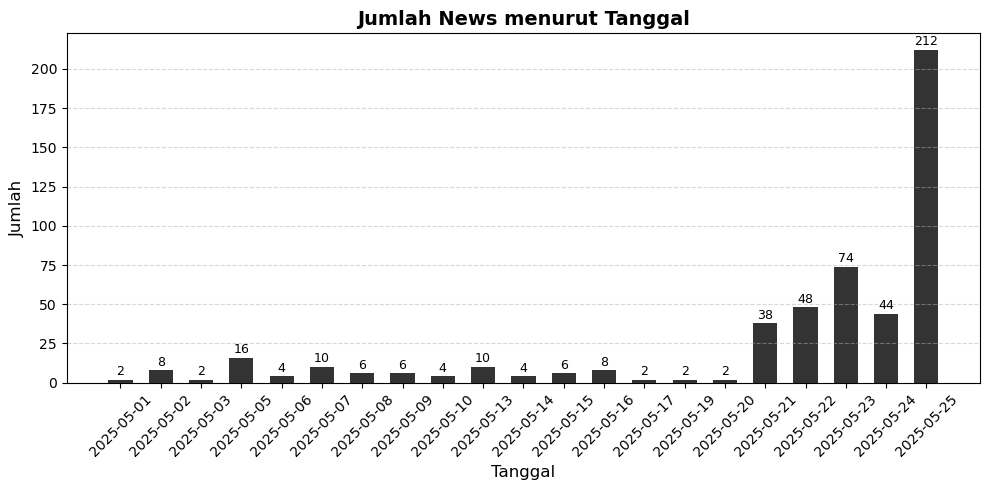

In [14]:
# Hitung frekuensi
counts = df.date.value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(counts.index.astype(str), counts.values, color=sentiment_colors['neutral'], width=0.6)

# Tambahkan nilai di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, int(yval), ha='center', va='bottom', fontsize=9)

# Dekorasi plot
plt.title('Jumlah News menurut Tanggal', fontsize=14, fontweight='bold')
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

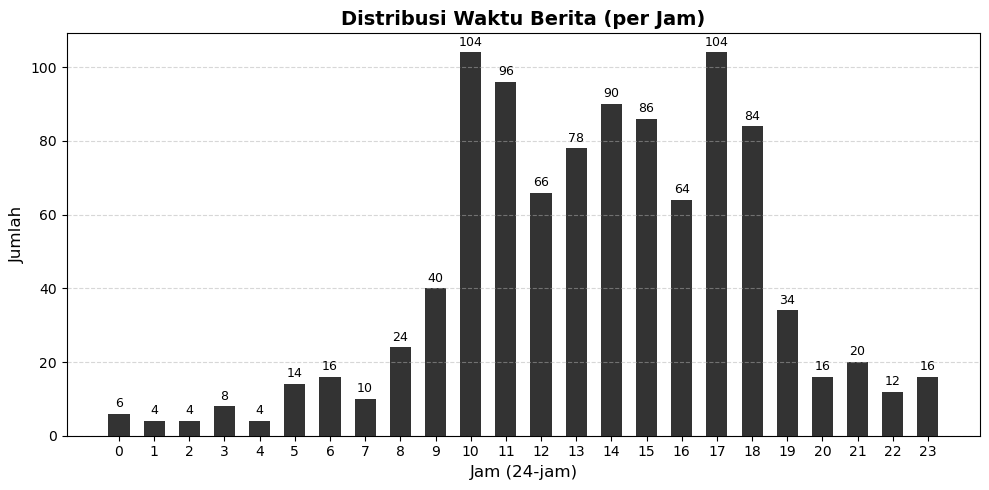

In [15]:
# Bersihkan 'WIB' dan konversi ke datetime.time
def parse_jam(jam_str):
    jam_str = jam_str.replace('WIB', '').strip()
    try:
        return datetime.strptime(jam_str, '%H:%M').time()
    except:
        return None

df['parsed_jam'] = df['jam'].apply(parse_jam)

# Ambil hanya jam-nya (tanpa menit)
df['jam_int'] = df['parsed_jam'].apply(lambda x: x.hour if pd.notnull(x) else None)

# Hitung distribusi
jam_counts = df['jam_int'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(jam_counts.index, jam_counts.values, color=sentiment_colors['neutral'], width=0.6)

# Tambahkan label angka di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, int(yval), ha='center', va='bottom', fontsize=9)

# Dekorasi plot
plt.title('Distribusi Waktu Berita (per Jam)', fontsize=14, fontweight='bold')
plt.xlabel('Jam (24-jam)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(jam_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()